<h1><center>Exploration of Energy in the United States</center></h1>

## Background and Purpose

### Fossil fuels have completely transformed our way of living ever since the Industrial Revolution, but they have also caused massive environmental damage, among other issues. As such, the goal of this project is to understand the energy landscape in the US and improve upon the shortcomings of Project 1, by reducing the total number of plots and telling a more focused story. There will also be more emphasis on the predictive model, rather than visualizations. Another major difference is that the data has been sourced using an API, rather than csv files.

In [1]:
# Firstly, import necessary libraries

import numpy as np
import pandas as pd
import os
import requests
import json
import pickle
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

## Importing Data using the EIA API and storing them in pickle files

### Requesting and importing data using the API is time consuming considering the huge amount of data. Therefore, I saved them in pickle files, which I later import directly. Below is the code I wrote for accessing data.
#### It is completely possible to run this code on anyone's machine and get the same output, given that they have an API key, which I have saved as an environment variable in my machine. Remember to uncomment my code first!

In [2]:
## Necessary variables for accessing the API

# KEY = os.environ.get('EIA_API')
# CAT_ROOT = r"https://api.eia.gov/category/?api_key=" + KEY + "&category_id="
# SER_ROOT = r"https://api.eia.gov/series/?api_key=" + KEY + "&series_id="

## For more info about the API, visit https://www.eia.gov/opendata/

In [3]:
# # CO2 emissions in the US

# URL = CAT_ROOT + '2251663'
# emissions = {}
# data = requests.get(URL).json()

# for j in data['category']['childcategories']:
#     url = CAT_ROOT + str(j['category_id'])
#     z = (requests.get(url).json())
#     temp = pd.DataFrame()
#     for i in z['category']['childseries']:
#         a = requests.get(SER_ROOT + i['series_id']).json()
#         df = pd.DataFrame({"Name" : a['series'][0]['name'].split(',')[2].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#         temp = temp.append(df)
#     temp.reset_index(drop=True, inplace=True)
#     emissions[j['name']] = temp
# # to save
# with open("emissions.pickle", "wb") as f:
#     pickle.dump(emissions, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
# # Primary Energy Production by Source

# ID = '711239'
# URL = CAT_ROOT + ID
# data = requests.get(URL).json()
# primary_energy_prod = pd.DataFrame()

# for i in data['category']['childseries']:
#     if i['f'] == 'A':
#         a = requests.get(SER_ROOT + i['series_id']).json()
#         df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[0].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#         primary_energy_prod = primary_energy_prod.append(df)
# primary_energy_prod.reset_index(drop=True, inplace=True)
# # to save
# with open("primary_energy_prod.pickle", "wb") as f:
#     pickle.dump(primary_energy_prod, f, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
# # Primary Energy Consumption by Source

# ID = '711240'
# URL = CAT_ROOT + ID
# data = requests.get(URL).json()
# primary_energy_cons = pd.DataFrame()

# for i in data['category']['childseries']:
#     if i['f'] == 'A':
#         a = requests.get(SER_ROOT + i['series_id']).json()
#         df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[0].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#         primary_energy_cons = primary_energy_cons.append(df)
# primary_energy_cons.reset_index(drop=True, inplace=True)
# # to save
# with open("primary_energy_cons.pickle", "wb") as f:
#     pickle.dump(primary_energy_cons, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# # Primary Energy Consumption by Sector

# include = ["Residential Sector Energy Consumption", "Commercial Sector Energy Consumption", 
#            "Industrial Sector Energy Consumption", "Transportation Sector Energy Consumption", 
#            "Electric Power Sector Energy Consumption"]

# URL = CAT_ROOT + '711226'
# energy_cons_sector = {}
# data = requests.get(URL).json()

# for j in data['category']['childcategories']:
#     if j['name'] in include:
#         url = CAT_ROOT + str(j['category_id'])
#         z = (requests.get(url).json())
#         temp = pd.DataFrame()
#         for i in z['category']['childseries']:
#             if i['f'] == 'A':
#                 a = requests.get(SER_ROOT + i['series_id']).json()
#                 df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[0].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#                 temp = temp.append(df)
#         temp.reset_index(drop=True, inplace=True)
#         energy_cons_sector[j['name']] = temp

# # to save
# with open("energy_cons_sector.pickle", "wb") as f:
#     pickle.dump(energy_cons_sector, f, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
# URL = CAT_ROOT + '40204'
# state_cons_sector = {}
# data = requests.get(URL).json()

# for j in data['category']['childcategories']:
#     if j['name'] != "Total End-Use Sectors":
#         url = CAT_ROOT + str(j['category_id'])
#         z = (requests.get(url).json())
#         temp = pd.DataFrame()
#         for i in z['category']['childseries']:
#             a = requests.get(SER_ROOT + i['series_id']).json()
#             df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#             temp = temp.append(df)
#         temp.reset_index(drop=True, inplace=True)
#         state_cons_sector[j['name']] = temp

# # to save
# with open("state_cons_sector.pickle", "wb") as f:
#     pickle.dump(state_cons_sector, f, protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
# URL = CAT_ROOT + '40426'
# data = requests.get(URL).json()
# temp = pd.DataFrame()

# for i in data['category']['childseries']:
#     a = requests.get(SER_ROOT + i['series_id']).json()
#     df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#     temp = temp.append(df)
# temp.reset_index(drop=True, inplace=True)
# state_renew_prod = temp
# # to save
# with open("state_renew_prod.pickle", "wb") as f:
#     pickle.dump(state_renew_prod, f, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
# URL = CAT_ROOT + '40207'
# data = requests.get(URL).json()
# temp = pd.DataFrame()

# for i in data['category']['childseries']:
#     a = requests.get(SER_ROOT + i['series_id']).json()
#     df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#     temp = temp.append(df)
# temp.reset_index(drop=True, inplace=True)
# state_energy_prod = temp
# # to save
# with open("state_energy_prod.pickle", "wb") as f:
#     pickle.dump(state_energy_prod, f, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# URL = CAT_ROOT + '40206'
# state_energy_expend = {}
# data = requests.get(URL).json()

# for j in data['category']['childcategories']:
#     if j['name'] != "Total End-Use Sectors":
#         url = CAT_ROOT + str(j['category_id'])
#         z = (requests.get(url).json())
#         temp = pd.DataFrame()
#         for i in z['category']['childseries']:
#             a = requests.get(SER_ROOT + i['series_id']).json()
#             df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#             temp = temp.append(df)
#         temp.reset_index(drop=True, inplace=True)
#         state_energy_expend[j['name']] = temp

# # to save
# with open("state_energy_expend.pickle", "wb") as f:
#     pickle.dump(state_energy_expend, f, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# URL = CAT_ROOT + '40425'
# data = requests.get(URL).json()
# temp = pd.DataFrame()

# for i in data['category']['childseries']:
#     a = requests.get(SER_ROOT + i['series_id']).json()
#     df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#     temp = temp.append(df)
# temp.reset_index(drop=True, inplace=True)
# state_renew_cons = temp
# # to save
# with open("state_renew_cons.pickle", "wb") as f:
#     pickle.dump(state_renew_cons, f, protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
# URL = CAT_ROOT + '40469'
# data = requests.get(URL).json()
# temp = pd.DataFrame()

# for i in data['category']['childseries']:
#     a = requests.get(SER_ROOT + i['series_id']).json()
#     df = pd.DataFrame({"Name":a['series'][0]['name'].split(',')[1].strip(), "Date":np.array(a['series'][0]['data'])[:,0], "Value" : np.array(a['series'][0]['data'])[:,1], "Unit":a['series'][0]['units']})
#     temp = temp.append(df)
# temp.reset_index(drop=True, inplace=True)
# state_fossil_cons = temp
# # to save
# with open("state_fossil_cons.pickle", "wb") as f:
#     pickle.dump(state_fossil_cons, f, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
# Load in the pickle files for analysis

with open("energy_cons_sector.pickle", "rb") as f:
    energy_cons_sector = pickle.load(f)
with open("primary_energy_cons.pickle", "rb") as f:
    primary_energy_cons = pickle.load(f)
with open("primary_energy_prod.pickle", "rb") as f:
    primary_energy_prod = pickle.load(f)
with open("emissions.pickle", "rb") as f:
    emissions = pickle.load(f)
with open("state_cons_sector.pickle", "rb") as f:
    state_cons_sector = pickle.load(f)
with open("state_renew_prod.pickle", "rb") as f:
    state_renew_prod = pickle.load(f)
with open("state_energy_prod.pickle", "rb") as f:
    state_energy_prod = pickle.load(f)
with open("state_energy_expend.pickle", "rb") as f:
    state_energy_expend = pickle.load(f)
with open("state_renew_cons.pickle", "rb") as f:
    state_renew_cons = pickle.load(f)
with open("state_fossil_cons.pickle", "rb") as f:
    state_fossil_cons = pickle.load(f)

# Time for Data Visualization and Analysis!

## Energy Production and Consumption in the US

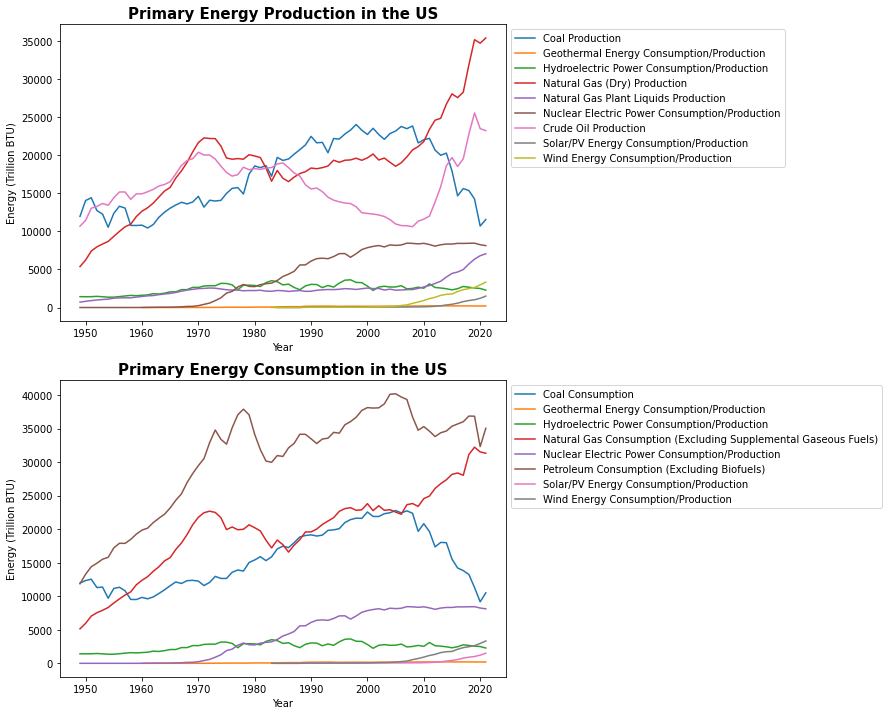

In [14]:
cons = primary_energy_cons[primary_energy_cons['Value'] != 'NA'].copy()
prod = primary_energy_prod[primary_energy_prod['Value'] != 'NA'].copy()
cons['Value'] = cons['Value'].astype('float')
cons['Date'] = pd.to_datetime(cons['Date'])
prod['Value'] = prod['Value'].astype('float')
prod['Date'] = pd.to_datetime(prod['Date'])
prod = prod[prod['Name'].str[:5] != "Total"]
cons = cons[cons['Name'].str[:5] != "Total"]

fig, ax = plt.subplots(2,1, figsize=(8,12))
sns.lineplot(x='Date', y='Value', data=prod, hue='Name', ax=ax[0])
ax[0].legend(bbox_to_anchor=(1, 1))
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Energy (Trillion BTU)")
ax[0].set_title("Primary Energy Production in the US", fontweight='bold', fontsize=15)

sns.lineplot(x='Date', y='Value', data=cons, hue='Name', ax=ax[1])
ax[1].legend(bbox_to_anchor=(1, 1))
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Energy (Trillion BTU)")
ax[1].set_title("Primary Energy Consumption in the US", fontweight='bold', fontsize=15)
plt.show()

### Natural gas and crude oil production have overtaken coal production in the US. Renewables are also slowly gaining traction. This is somewhat true for the consumption plot as well.

## Energy Consumption by Sector

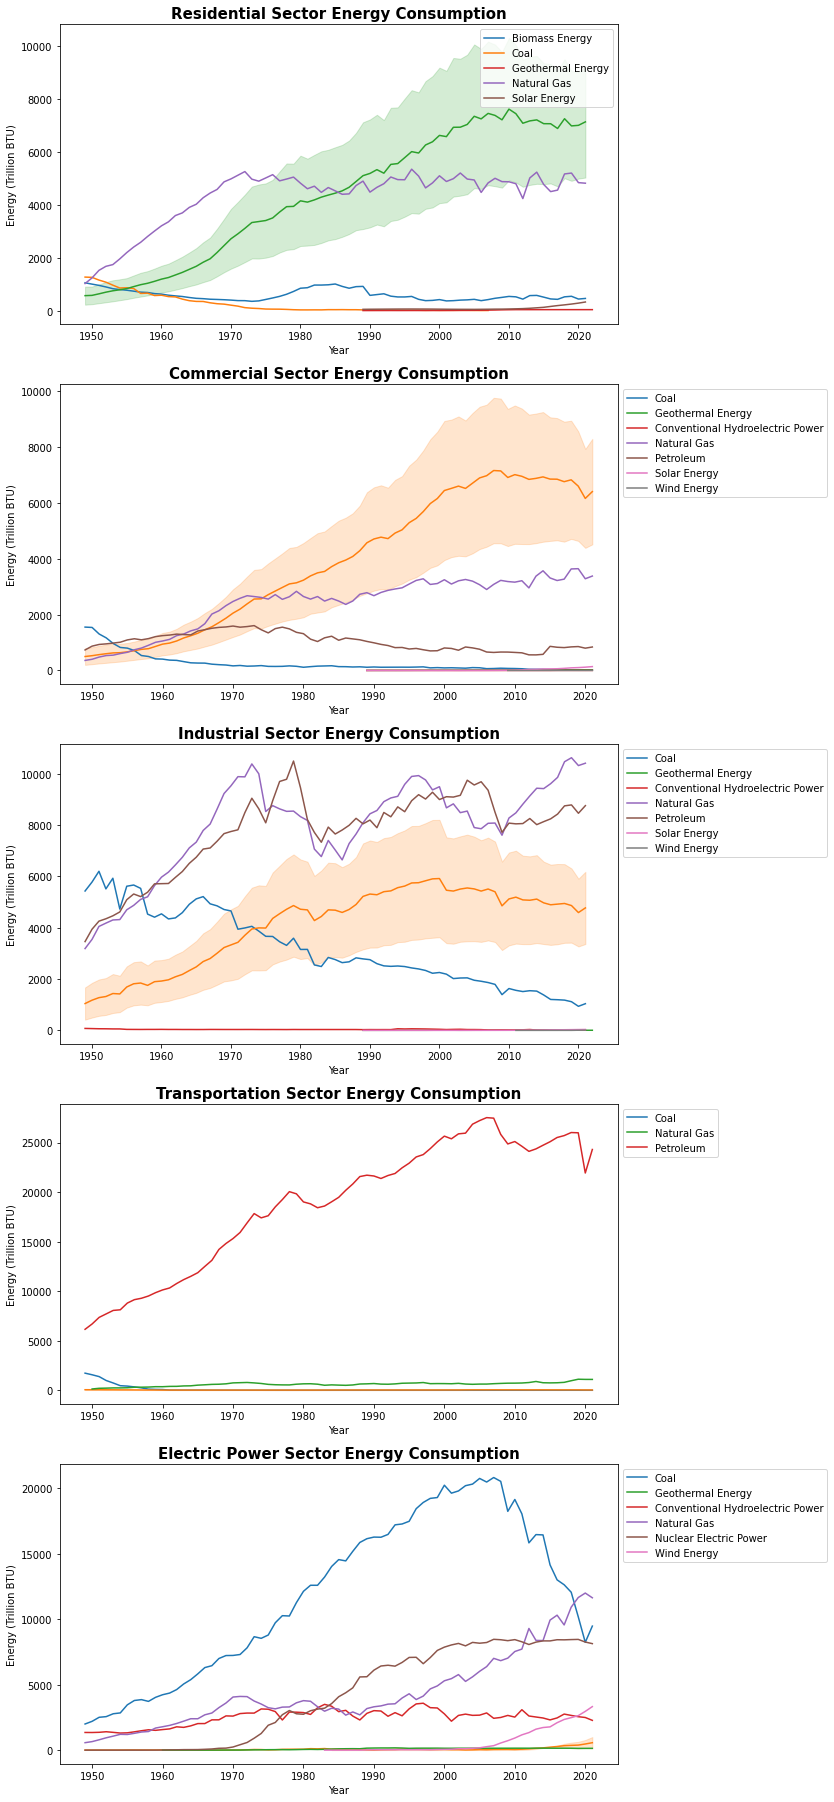

In [15]:
options = list(energy_cons_sector.keys())

clean = lambda x : x.rpartition(' Consumed')[0]

fig, ax = plt.subplots(5,1, figsize=(10,32))

for i in range(len(options)):
    temp = energy_cons_sector[options[i]].copy()
    temp['Value'] = pd.to_numeric(temp['Value'], errors='coerce')
    temp = temp.dropna()
    temp['Name'] = temp[['Name']].applymap(clean)
    temp = temp[temp['Name'].str[:5] != "Total"]
    temp['Date'] = pd.to_datetime(temp['Date'])
    sns.lineplot(x='Date', y='Value', data=temp, hue='Name', ax=ax[i])
    ax[i].legend(bbox_to_anchor=(1, 1))
    ax[i].set_xlabel("Year")
    ax[i].set_ylabel("Energy (Trillion BTU)")
    ax[i].set_title(options[i], fontweight='bold', fontsize=15)

## Plotting state-wise provides in-depth information

### Import shape file for the geo-plots

In [16]:
# load in shapefile from census website
df = gpd.read_file(r'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip')

# Load in population data from the census website
pop = pd.read_csv("https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv")

# remove certain states
exclude = [15,2,72,66,69,60,78]
df = df.loc[~df['STATEFP'].astype('int').isin(exclude)]
df.drop(['ALAND','AWATER','LSAD','AFFGEOID'], axis=1, inplace=True)
pop = pop[['NAME', 'POPESTIMATE2019']]

# merge the datasets
df = pd.merge(df, pop, on='NAME', how='left')

# change crs
df = df.to_crs('EPSG:5070')

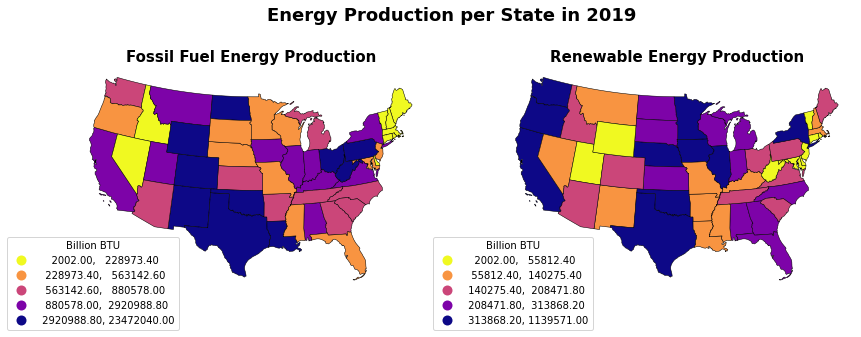

In [17]:
fossil = state_energy_prod.copy()
temp = state_renew_prod.copy()
exclude = set(fossil.Name.unique()) - set(temp.Name.unique())
fossil = fossil[~fossil['Name'].isin(exclude)]
fossil['Value'] = fossil['Value'].astype('float')
fossil['Date'] = pd.to_datetime(fossil['Date'])
temp['Date'] = pd.to_datetime(temp['Date'])

fossil = fossil.rename(columns={'Name':'NAME'})
fossil = pd.merge(df,fossil,on='NAME', how='left')
fossil = fossil[fossil['Date'] == max(fossil['Date'])]
fossil.set_geometry('geometry')

temp = temp.rename(columns={'Name':'NAME'})
temp['Value'] = temp.Value.astype('float')
temp = pd.merge(df,temp,on='NAME', how='left')
temp = temp[temp['Date'] == max(temp['Date'])]
temp.set_geometry('geometry')

fig, ax = plt.subplots(1,2, figsize=(14,5))

fossil.plot(column='Value', cmap='plasma_r', ax=ax[0], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
ax[0].set_title("Fossil Fuel Energy Production", fontweight='bold', fontsize=15)
ax[0].get_legend().set_bbox_to_anchor((-0.2,-0.2))
ax[0].get_legend().set_title("Billion BTU")
ax[0].set_axis_off()

temp.plot(column='Value', cmap='plasma_r', ax=ax[1], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
ax[1].set_title("Renewable Energy Production", fontweight='bold', fontsize=15)
ax[1].get_legend().set_bbox_to_anchor((-0.2,-0.2))
ax[1].get_legend().set_title("Billion BTU")
ax[1].set_axis_off()

plt.suptitle("Energy Production per State in " + str(temp['Date'][0].year), fontweight='bold', fontsize=18)
plt.show()

### Fossil fuels are mainly produced in the central southern states, like Texas, New Mexico, etc.
### Renewable energy is mainly produced along the west coast, as well as in states like Texas. 

## Let's look at Consumption now

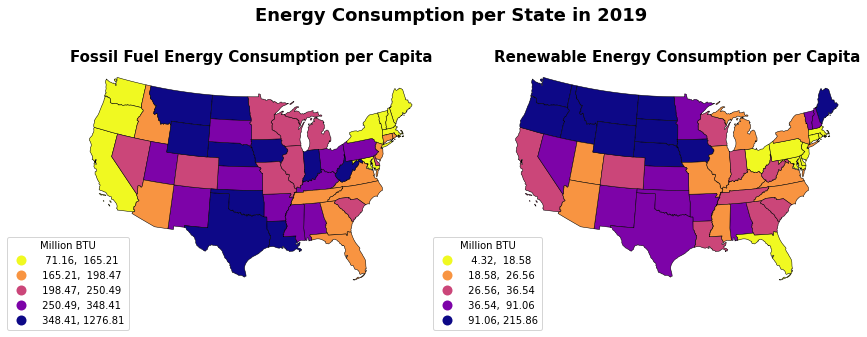

In [18]:
temp = state_fossil_cons[state_fossil_cons['Date'] == "2019"].copy()
temp.rename(columns={"Name":"NAME"}, inplace=True)
temp = pd.merge(df, temp, on="NAME")
temp.Value = temp.Value.astype("float")
temp.Value = (temp.Value * 1000) / temp.POPESTIMATE2019

renew = state_renew_cons[state_renew_cons['Date'] == "2019"].copy()
renew.rename(columns={"Name":"NAME"}, inplace=True)
renew = pd.merge(df, renew, on="NAME")
renew.Value = renew.Value.astype("float")
renew.Value = (renew.Value * 1000) / renew.POPESTIMATE2019

fig, ax = plt.subplots(1,2, figsize=(14,5))

temp.plot(column='Value', cmap='plasma_r', ax=ax[0], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
ax[0].set_title("Fossil Fuel Energy Consumption per Capita", fontweight='bold', fontsize=15)
ax[0].get_legend().set_bbox_to_anchor((-0.2,-0.2))
ax[0].get_legend().set_title("Million BTU")
ax[0].set_axis_off()

renew.plot(column='Value', cmap='plasma_r', ax=ax[1], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
ax[1].set_title("Renewable Energy Consumption per Capita", fontweight='bold', fontsize=15)
ax[1].get_legend().set_bbox_to_anchor((-0.2,-0.2))
ax[1].get_legend().set_title("Million BTU")
ax[1].set_axis_off()

plt.suptitle("Energy Consumption per State in 2019", fontweight='bold', fontsize=18)
plt.show()

### Per capita fossil fuel consumption is high in states like Texas, where it may be mainly used for cooling during hot summers, and in states in the north, where it may be mainly used for heating in the winters.

## Let us look at state-wise consumption by sector

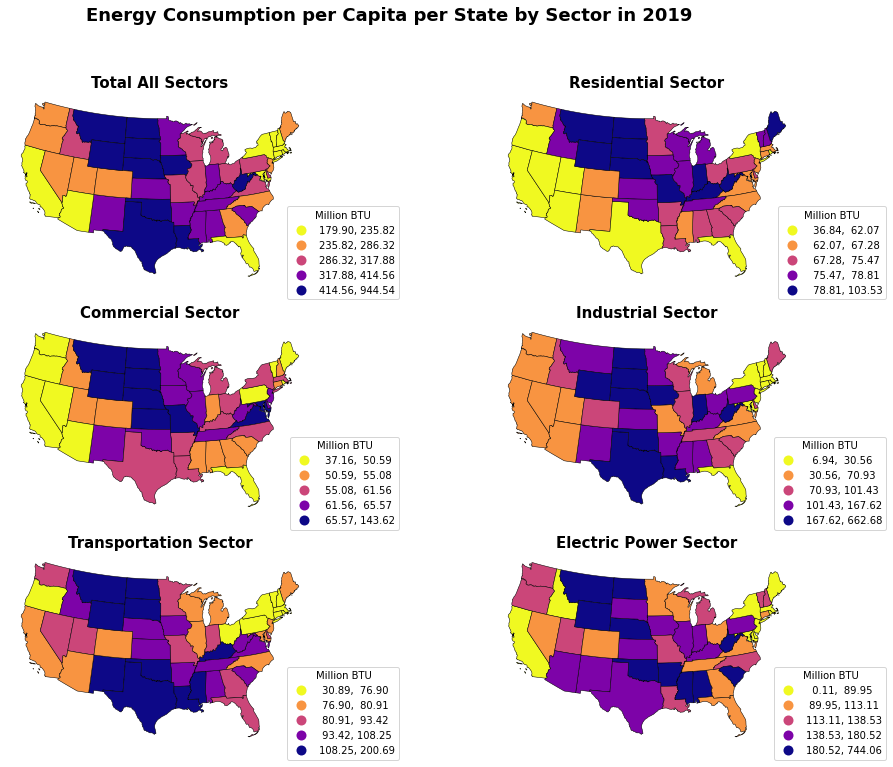

In [19]:
options = list(state_cons_sector.keys())

fig, ax = plt.subplots(3,2, figsize=(16,12))
index = 0
for i in range(3):
    for j in range(2):
        temp = state_cons_sector[options[index]]
        temp = temp.rename(columns={'Name':'NAME'})
        a = pd.merge(df,temp,on='NAME', how='left')
        a = a[a['Date'] == max(a['Date'])]
        a['Value'] = a.Value.astype('float')
        a['Value'] = (a['Value']*1000) / a['POPESTIMATE2019']
        a.set_geometry('geometry')
        a.plot(column='Value', cmap='plasma_r', ax=ax[i,j], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower right'}, edgecolor='k', linewidth=0.5)
        ax[i,j].set_title(options[index], fontweight='bold', fontsize=15)
        ax[i,j].get_legend().set_bbox_to_anchor((1.3,-0.1))
        ax[i,j].get_legend().set_title("Million BTU")
        ax[i,j].set_axis_off()
        index += 1
plt.suptitle("Energy Consumption per Capita per State by Sector in " + a['Date'][0], fontweight='bold', fontsize=18)
plt.show()

### These plots clearly show how much a certain state consumes energy for a specific sector. For example, the industrial sector consumption, per capita, is high in states like Texas, and the midwest/great plains.

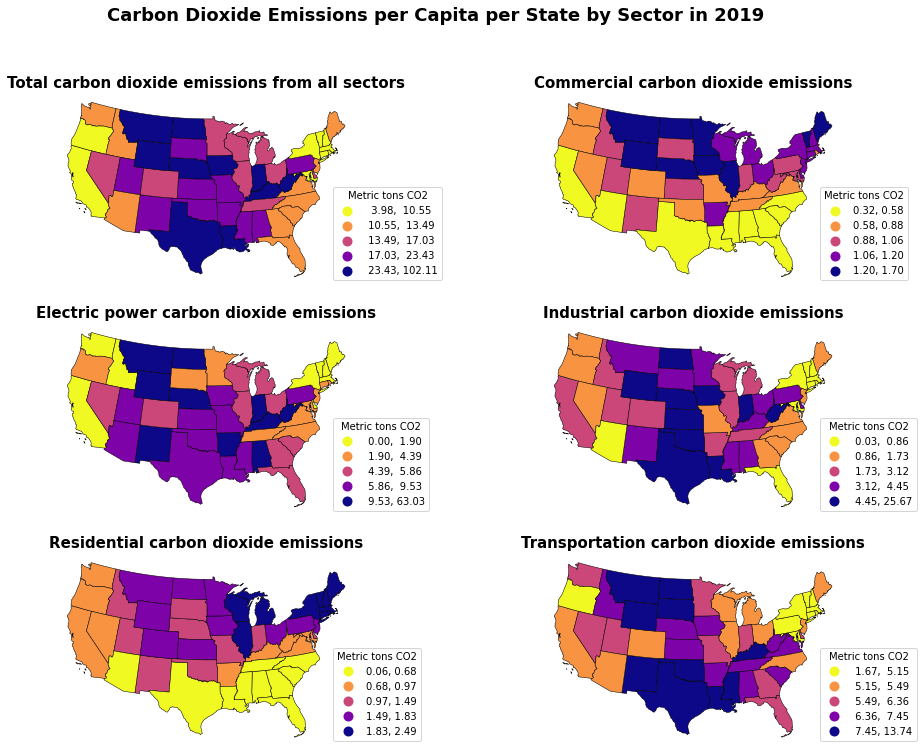

In [20]:
options = ['Total carbon dioxide emissions from all sectors','Commercial carbon dioxide emissions', 
           'Electric power carbon dioxide emissions','Industrial carbon dioxide emissions',
           'Residential carbon dioxide emissions','Transportation carbon dioxide emissions']

fig, ax = plt.subplots(3,2, figsize=(16,12))
index = 0
for i in range(3):
    for j in range(2):
        temp = emissions[options[index]]
        temp = temp.rename(columns={'Name':'NAME'})
        a = pd.merge(df,temp,on='NAME', how='left')
        a = a[a['Date'] == max(a['Date'])]
        a['Value'] = a.Value.astype('float')
        a['Value'] = (a['Value']*1000000) / a['POPESTIMATE2019']
        a.set_geometry('geometry')
        a.plot(column='Value', cmap='plasma_r', ax=ax[i,j], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
        ax[i,j].set_title(options[index], fontweight='bold', fontsize=15)
        ax[i,j].get_legend().set_bbox_to_anchor((0.9,0))
        ax[i,j].get_legend().set_title("Metric tons CO2")
        ax[i,j].set_axis_off()
        index += 1
plt.suptitle("Carbon Dioxide Emissions per Capita per State by Sector in " + a['Date'][0], fontweight='bold', fontsize=18)
plt.show()

### As expected, there is high correlation between the states where energy is produced/consumed and the states where the emission occurs. 

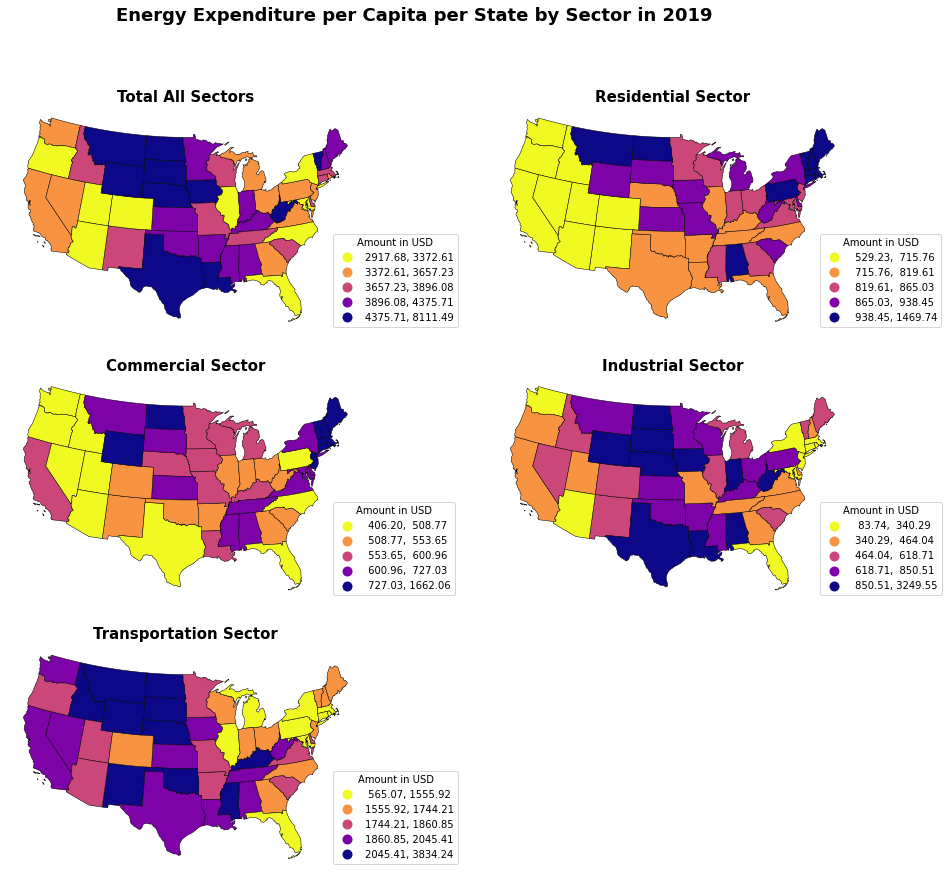

In [21]:
options = list(state_energy_expend.keys())

fig, ax = plt.subplots(3,2, figsize=(16,14))
index = 0
for i in range(3):
    for j in range(2):
        if index == 5:
            break
        temp = state_energy_expend[options[index]]
        temp = temp.rename(columns={'Name':'NAME'})
        a = pd.merge(df,temp,on='NAME', how='left')
        a = a[a['Date'] == max(a['Date'])]
        a['Value'] = a.Value.astype('float')
        a['Value'] = (a['Value']*1000000) / a['POPESTIMATE2019']
        a.set_geometry('geometry')
        a.plot(column='Value', cmap='plasma_r', ax=ax[i,j], scheme='Quantiles', legend=True, 
               legend_kwds={'loc':'lower left'}, edgecolor='k', linewidth=0.5)
        ax[i,j].set_title(options[index], fontweight='bold', fontsize=15)
        ax[i,j].get_legend().set_bbox_to_anchor((0.9,0))
        ax[i,j].get_legend().set_title("Amount in USD")
        ax[i,j].set_axis_off()
        index += 1
plt.suptitle("Energy Expenditure per Capita per State by Sector in " + a['Date'][0], fontweight='bold', fontsize=18)
plt.delaxes(ax[2,1])
plt.show()

### These plots give a sense of how much an average person spends on energy per year in each state. This is high in states like Texas, and the central north. Throughout our data exploration, Texas has been a recurring state in terms of production, consumption, and expenditure.

## Time to train a model!

### Question: Is there any trend that renewables are on track to replace fossil fuels in the coming years?
#### We will see what the model suggests, but my hypothesis is that although fossil fuels will continue to dominate the energy landspace for some more time, renewables are gaining popularity, as cost per KWh decreases and the technology advances.

In [22]:
# These functions will come in handy several times while building the model

# this function returns the forecast for a given model for a certain # of years
def make_forecasts(years, start_input, model):
    temp = start_input
    output = list()
    for i in range(years):
        temp = temp.reshape(1,1,5)
        prediction = model.predict(temp)
        temp = np.append(temp[0][0][1:], prediction)
        output.append(prediction.reshape(1))
    return np.array(output)

# this function creates datetime objects for plotting
def create_datetimes(num_years, start_year):
    return [date(i,1,1) for i in range(start_year, start_year + num_years)]

# this function divides the values and the labels of the dataset
def create_dataset(dataset, window_len):
    X, Y = [], []
    for i in range(len(dataset) - window_len):
        X.append(dataset[i:(i+window_len),0])
        Y.append(dataset[i + window_len,0])
    return np.array(X), np.array(Y)

### We will train the model on fossil fuel consumption first, then renewable energy consumption later.
#### Although there are some nuances in the data that are lost when we aggregate state-wise, this will largely simplify the otherwise huge model we would have to deal with. For the purposes of this project and the insight I intend to draw from it, the national level consumption data will suffice.

In [23]:
temp = state_fossil_cons.copy()
temp['Value'] = temp.Value.astype('float')
temp["Date"] = pd.to_datetime(temp.Date)
df = temp.groupby("Date").sum() # unit = Billion Btu
df = df.sort_values('Date')
df.head()

,Value
Date,
1960-01-01,84173433.0
1961-01-01,85417005.0
1962-01-01,89260302.0
1963-01-01,92948824.0
1964-01-01,97000426.0


In [24]:
# Convert the data into floats and scale it between 0 and 1
# This is to ensure better model performance.

dataset = df.values
dataset = dataset.astype('float')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [25]:
# I will set the length of a window to be 5
# This means that for each label, the model is able to see what the preceding 5 values were
# It will make a prediction based on the past 5 values.

window_len = 5
X_train, Y_train = create_dataset(dataset, window_len)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

### We will be using a deep reccurent neural network, with LSTM (Long-short term memory) cells. This is a specialized neural network designed specifically to handle time-series data.
#### The first input layer is the LSTM layer, with ReLU activation, followed by a dropout layer to prevent overfitting (which is a concern for the small dataset we have), and finally a dense output layer of 1 neuron for the singular output value. Without going into the theoretical details, that is a brief summarization of the model. So let's go ahead and train!

In [26]:
model = keras.models.Sequential([
        keras.layers.LSTM(256, activation='relu', return_sequences = True, 
                          input_shape = (X_train.shape[1], X_train.shape[2])),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(), loss='mse')
history = model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
55/55 [==============================] - 1s 2ms/step - loss: 0.1442
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 13/20
55/55 [==============================

In [27]:
fossil_train_predict = model.predict(X_train).reshape(X_train.shape[0],1)
# invert predictions
fossil_train_predict = scaler.inverse_transform(fossil_train_predict)
fossil_Y_train = scaler.inverse_transform(Y_train.reshape(-1,1))

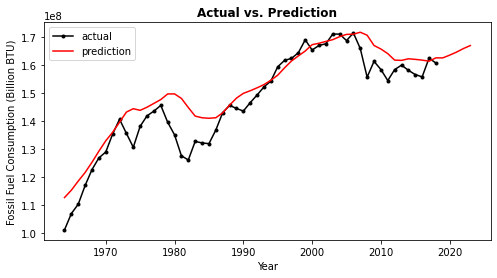

In [28]:
fossil_output = make_forecasts(5, X_train[-1], model)
x1 = create_datetimes(55, 1964)
x2 = create_datetimes(60, 1964)
fossil_train_predict = np.append(fossil_train_predict, scaler.inverse_transform(fossil_output))
plt.figure(figsize=(8,4))
plt.plot(x1, fossil_Y_train[:], 'k',marker='.', label="actual")
plt.plot(x2, fossil_train_predict, 'r', label="prediction")

plt.ylabel('Fossil Fuel Consumption (Billion BTU)')
plt.xlabel('Year')
plt.title("Actual vs. Prediction", fontweight='bold')
plt.legend()
plt.show()

## Model for Renewables consumption

In [29]:
temp = state_renew_cons.copy()
temp['Value'] = temp.Value.astype('float')
temp["Date"] = pd.to_datetime(temp.Date)
df = temp.groupby("Date").sum() # unit = Billion Btu
df = df.sort_values('Date')
df.head()

,Value
Date,
1960-01-01,5856408.0
1961-01-01,5904455.0
1962-01-01,6234887.0
1963-01-01,6192865.0
1964-01-01,6450499.0


In [30]:
dataset = df.values
dataset = dataset.astype('float')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [31]:
window_len = 5
X_train, Y_train = create_dataset(dataset, window_len)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [32]:
model = keras.models.Sequential([
        keras.layers.LSTM(256, activation='relu', return_sequences = True, 
                          input_shape = (X_train.shape[1], X_train.shape[2])),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(), loss='mse')
history = model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1, shuffle=False)

Epoch 1/20
55/55 [==============================] - 1s 2ms/step - loss: 0.0301
Epoch 2/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 3/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 4/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 5/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 6/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 8/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 9/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 10/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 11/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 12/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 13/20
55/55 [==============================

In [33]:
renew_train_predict = model.predict(X_train).reshape(X_train.shape[0],1)
# invert predictions
renew_train_predict = scaler.inverse_transform(renew_train_predict)
renew_Y_train = scaler.inverse_transform(Y_train.reshape(-1,1))

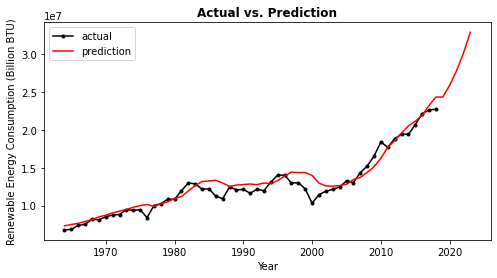

In [34]:
renew_output = make_forecasts(5, X_train[-1], model)
x1 = create_datetimes(55, 1964)
x2 = create_datetimes(60, 1964)
renew_train_predict = np.append(renew_train_predict, scaler.inverse_transform(renew_output))
plt.figure(figsize=(8,4))
plt.plot(x1, renew_Y_train[:], 'k',marker='.', label="actual")
plt.plot(x2, renew_train_predict, 'r', label="prediction")

plt.ylabel('Renewable Energy Consumption (Billion BTU)')
plt.xlabel('Year')
plt.title("Actual vs. Prediction", fontweight='bold')
plt.legend()
plt.show()

### Plotting both fossil consumption and renewable energy consumption will make it easier to compare both, especially with the x-axis scale being comparable

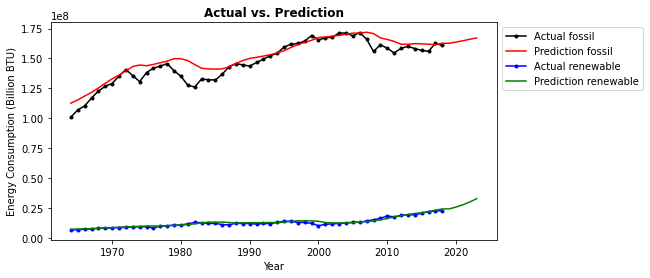

In [35]:
plt.figure(figsize=(8,4))
plt.plot(x1, fossil_Y_train[:], 'black',marker='.', label="Actual fossil")
plt.plot(x2, fossil_train_predict, 'red', label="Prediction fossil")
plt.plot(x1, renew_Y_train[:], 'blue',marker='.', label="Actual renewable")
plt.plot(x2, renew_train_predict, 'green', label="Prediction renewable")

plt.ylabel('Energy Consumption (Billion BTU)')
plt.xlabel('Year')
plt.title("Actual vs. Prediction", fontweight='bold')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### As hypothesized, fossil fuels are still predicted to dominate, by a huge margin, for the foreseeable future. However, there is some sliver of hope, in that fossil fuel consumption is stagnating and even on the path to decrease. Renewables, at the same time, are gaining ground. Although the rate of adoption of renewables must considerably increase to prevent any permanent damage to the environment, this prediction does hint at a optimistic future.

#### Along with the positive prediction of the model, it is important to note some of its shortcomings. For one, energy production/consumption are complex global matters with a huge number of factors. Just feeding some data into a predictive model and going solely off of that would be a foolish decision. This should only be one part of a multivariate analysis of the energy landscape. Two, as I said before, building a model for each state and each type of energy source would give much more detailed insight, but it is computationally expensive. 